In [1]:
import pymongo
import pandas as pd

In [2]:
connection_string = "mongodb://localhost:27017/"
username = "root"
password = "mongopass"

client = pymongo.MongoClient(connection_string, username=username, password=password)

In [3]:
client.list_database_names()

['admin', 'config', 'local', 'studentSummary']

In [4]:
db = client["studentSummary"]

In [6]:
collection = db["summaries"]

In [10]:
collection.count_documents({})

7165

In [14]:
for doc in collection.find({}).limit(5):
    print(doc)

{'_id': ObjectId('654a21087e5aa348957c1015'), 'student_id': '000e8c3c7ddb', 'prompt_id': '814d6b', 'text': 'The third wave was an experimentto see how people reacted to a new one leader government. It gained popularity as people wanted to try new things. The students follow anything that is said and start turning on eachother to gain higher power. They had to stop the experement as too many people got to radical with it blindly following there leader', 'content': 0.205682506482641, 'wording': 0.380537638762288}
{'_id': ObjectId('654a21087e5aa348957c1016'), 'student_id': '0020ae56ffbf', 'prompt_id': 'ebad26', 'text': 'They would rub it up with soda to make the smell go away and it wouldnt be a bad smell. Some of the meat would be tossed on the floor where there was sawdust spit of the workers and they would make the meat all over again with the things in it.', 'content': -0.548304076980462, 'wording': 0.506755353548534}
{'_id': ObjectId('654a21087e5aa348957c1017'), 'student_id': '004e97

In [18]:
# find null values in text column
for doc in collection.find({"text": None}):
    print(doc)

In [21]:

# find special characters and punctuation in text column
for doc in collection.find({"text": {"$regex": "[*.,!@#$%^&(){}[\]\;:|?/<>=+]"}}):
    print(doc)

{'_id': ObjectId('654a21087e5aa348957c1015'), 'student_id': '000e8c3c7ddb', 'prompt_id': '814d6b', 'text': 'The third wave was an experimentto see how people reacted to a new one leader government. It gained popularity as people wanted to try new things. The students follow anything that is said and start turning on eachother to gain higher power. They had to stop the experement as too many people got to radical with it blindly following there leader', 'content': 0.205682506482641, 'wording': 0.380537638762288}
{'_id': ObjectId('654a21087e5aa348957c1016'), 'student_id': '0020ae56ffbf', 'prompt_id': 'ebad26', 'text': 'They would rub it up with soda to make the smell go away and it wouldnt be a bad smell. Some of the meat would be tossed on the floor where there was sawdust spit of the workers and they would make the meat all over again with the things in it.', 'content': -0.548304076980462, 'wording': 0.506755353548534}
{'_id': ObjectId('654a21087e5aa348957c1017'), 'student_id': '004e97

In [23]:
import re

# remove special characters and punctuation in text column
for doc in collection.find({"text": {"$regex": "[*.,!@#$%^&(){}[\]\;:|?/<>=+]"}}):
    text = doc["text"]
    text = re.sub(r'[^\w\s]','',text)
    # add new column to collection
    collection.update_one({"_id": doc["_id"]}, {"$set": {"clean_text": text}})


In [46]:
# get only content column using find

content = []
wording = []

for doc in collection.find({}, {"content": 1, 'wording': 1}):
    content.append(doc['content'])
    wording.append(doc['wording'])

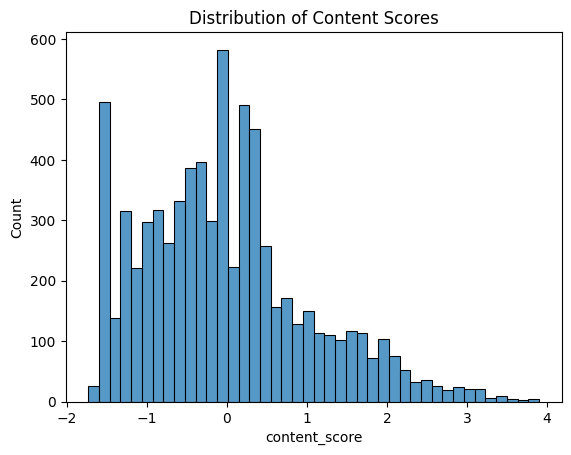

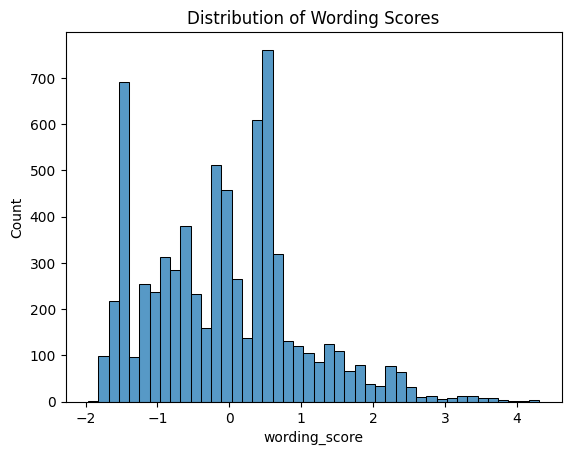

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt


# calculate summary statistics for content and wording scores

content_scores_df = pd.DataFrame(content, columns=["content_score"])
wording_scores_df = pd.DataFrame(wording, columns=["wording_score"])

# visualize distribution of content and wording scores using seaborn histplot
sns.histplot(content_scores_df, x="content_score")
plt.title("Distribution of Content Scores")
plt.show()

sns.histplot(wording_scores_df, x="wording_score")
plt.title("Distribution of Wording Scores")
plt.show()




In [51]:
import wordcloud


In [57]:
for doc in collection.find({"clean_text": None}):
    text = doc["text"]
    collection.update_one({"_id": doc["_id"]}, {"$set": {"clean_text": text}})

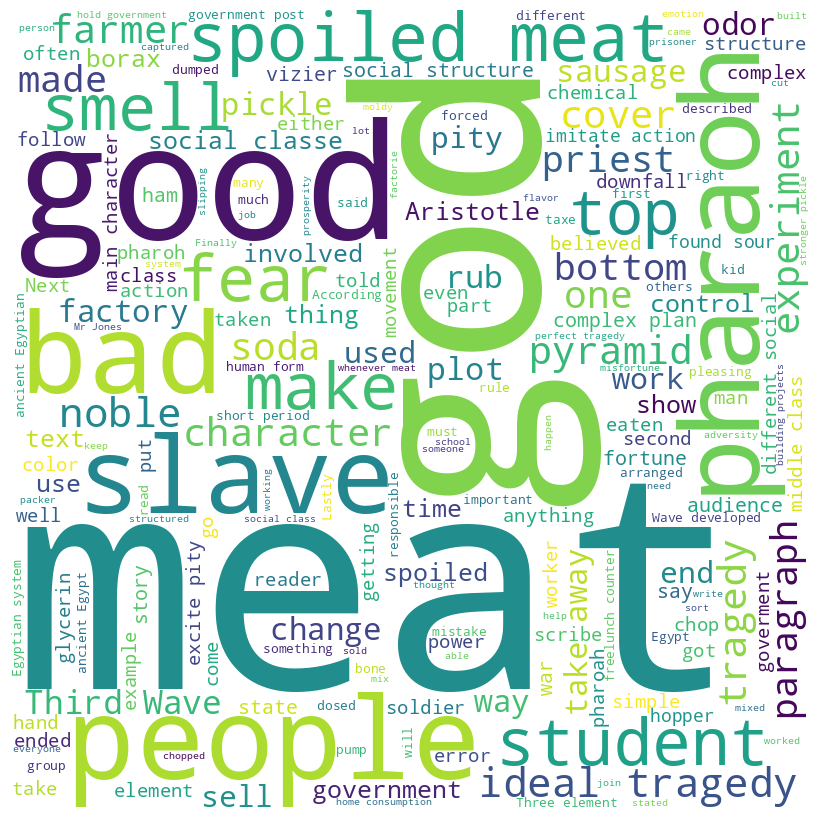

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# extract text from summaries
text = ""
for doc in collection.find({}, {"clean_text": 1}):
    text += doc["clean_text"] + " "

# generate word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

# plot word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [63]:
summary_lengths = [len(doc["text"]) for doc in collection.find()]
summary_lengths_df = pd.DataFrame(summary_lengths, columns=["summary_length"])
summary_lengths_df.describe()


summary_length
count     7165.000000
mean       418.776971
std        307.833685
min        114.000000
25%        216.000000
50%        320.000000
75%        513.000000
max       3940.000000

In [69]:
pipeline = [
    {"$group": {"_id": "$content", "avg_wording_score": {"$avg": "$wording"}}}
]

result = list(collection.aggregate(pipeline))
print(result)


[{'_id': 1.80979023827579, 'avg_wording_score': -0.307132449169547}, {'_id': 2.29991096017019, 'avg_wording_score': 2.38848201962118}, {'_id': -0.440945517091307, 'avg_wording_score': -0.889784645812635}, {'_id': 2.94145992254606, 'avg_wording_score': 1.78884701589237}, {'_id': -0.120002765788812, 'avg_wording_score': 0.177083804458211}, {'_id': -0.69377344648424, 'avg_wording_score': -0.49057149390192994}, {'_id': 0.423472474001539, 'avg_wording_score': 1.21273059980121}, {'_id': 1.20516138615263, 'avg_wording_score': -0.132403044837851}, {'_id': 2.55061546647052, 'avg_wording_score': 2.4614138382119}, {'_id': -1.1880266608716, 'avg_wording_score': -1.24925125834309}, {'_id': 2.20464026582261, 'avg_wording_score': -0.64534372843799}, {'_id': -0.830403499571929, 'avg_wording_score': 0.508407365023329}, {'_id': 1.74020151737087, 'avg_wording_score': 0.622326266684616}, {'_id': 1.98623055844115, 'avg_wording_score': 1.00340417049705}, {'_id': 2.3119158307126, 'avg_wording_score': 1.20685

In [79]:
filter={}
projection={
    'content': 1, 
    'wording': 1
}
sort=list({
    'content': -1, 
    'wording': -1
}.items())
limit=5

result = collection.find(
  filter=filter,
  projection=projection,
  sort=sort,
  limit=limit
)

list(result)

[{'_id': ObjectId('654a21087e5aa348957c261e'),
  'content': 3.90032610436019,
  'wording': 0.556479831902046},
 {'_id': ObjectId('654a21087e5aa348957c1a3a'),
  'content': 3.89407018877461,
  'wording': 2.96555950675304},
 {'_id': ObjectId('654a21087e5aa348957c1590'),
  'content': 3.83442997105841,
  'wording': 2.63027064754351},
 {'_id': ObjectId('654a21087e5aa348957c130f'),
  'content': 3.80272207089915,
  'wording': 3.51483103434524},
 {'_id': ObjectId('654a21087e5aa348957c1094'),
  'content': 3.80272207089915,
  'wording': 3.51483103434524}]